In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

data = pd.read_excel(r"C:\Users\然\Desktop\MTG version cognitive.xlsx")
cell_columns = data.columns[69:93]
severity_column = data.columns[53]
grouped = data.groupby(severity_column)[cell_columns].mean()
anova_results = {}
print(grouped)

                                     Unnamed: 69     L5 IT     Pvalb  \
Overall AD neuropathological Change                                    
High                                         NaN  8.467133  5.622666   
Intermediate                                 NaN  8.621952  6.797873   
Low                                          NaN  8.244766  6.605805   
Not AD                                       NaN  8.671221  6.530952   

                                          Sst      L4 IT  L6 IT Car3  \
Overall AD neuropathological Change                                    
High                                 3.136944  13.351537    1.810567   
Intermediate                         3.886139  12.334382    1.722004   
Low                                  3.904587  10.970346    1.544402   
Not AD                               4.423537  10.414538    1.607694   

                                      L5/6 NP     L6 IT       Vip       L6b  \
Overall AD neuropathological Change                    

<Figure size 1200x800 with 0 Axes>

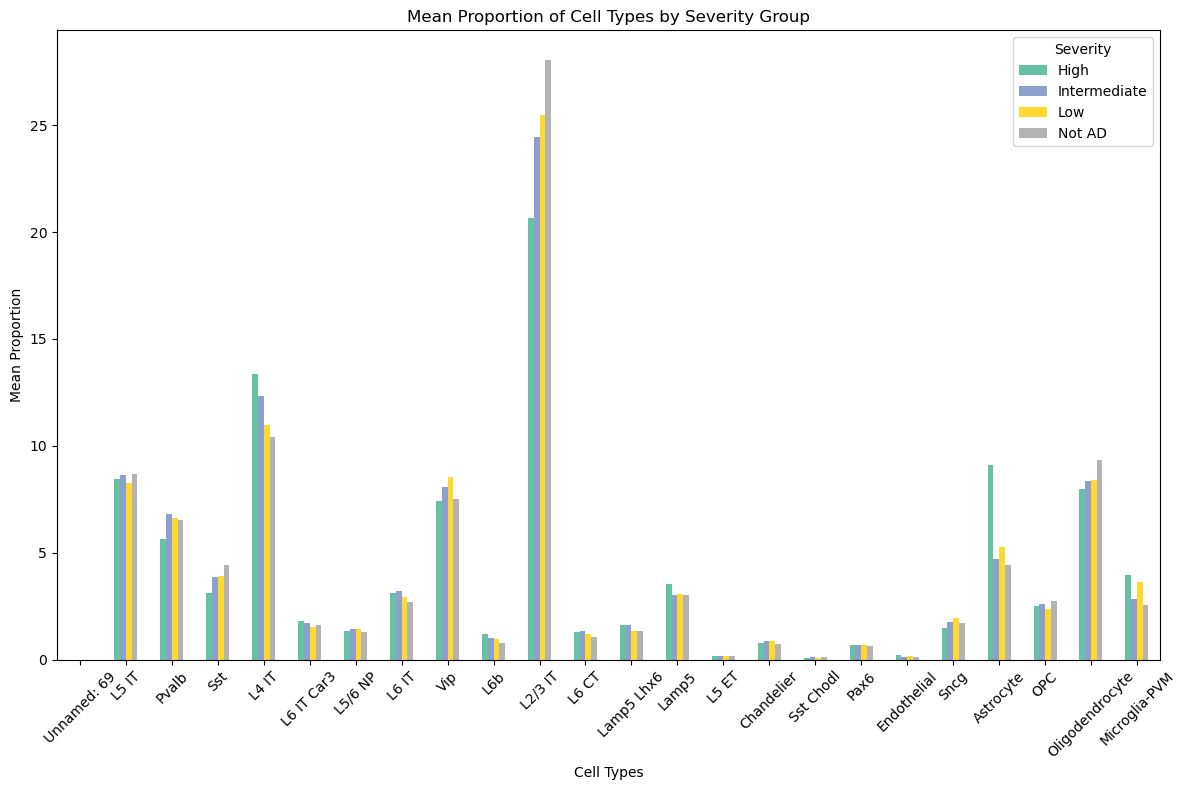

In [3]:
plt.figure(figsize=(12, 8))
grouped.T.plot(kind='bar', figsize=(12, 8), cmap='Set2')
plt.xlabel('Cell Types')
plt.ylabel('Mean Proportion')
plt.title('Mean Proportion of Cell Types by Severity Group')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import f_oneway

anova_results = {}
for cell_type in cell_columns:
    groups = [
        data[data[severity_column] == severity][cell_type].dropna()
        for severity in data[severity_column].unique()
    ]
    
    # 确保每组至少有两个数据点
    if all(len(group) > 1 for group in groups):
        anova_results[cell_type] = f_oneway(*groups)
    else:
        anova_results[cell_type] = (None, None)  # 标记为无法计算

# 创建 ANOVA 结果表
anova_df = pd.DataFrame({
    'CellType': cell_columns,
    'F-Value': [anova_results[cell][0] if anova_results[cell][0] is not None else 'NaN' for cell in cell_columns],
    'P-Value': [anova_results[cell][1] if anova_results[cell][1] is not None else 'NaN' for cell in cell_columns],
})

print("ANOVA Results:")
print(anova_df)

ANOVA Results:
           CellType   F-Value   P-Value
0           L2/3 IT  2.116572  0.105335
1             L5 IT  0.652720  0.583762
2             Pvalb  0.249738  0.861278
3               Vip  0.119233  0.948529
4               Sst  0.027909  0.993659
5             L4 IT  1.692968  0.175868
6         Astrocyte  2.122385  0.104593
7             L6 IT  1.426151  0.241951
8   Oligodendrocyte  2.188589  0.096503
9             Lamp5  1.193914  0.318027
10              OPC  0.394642  0.757220
11            L6 CT  1.604210  0.195644
12             Sncg  0.120315  0.947878
13              L6b  0.598824  0.617786
14       Lamp5 Lhx6  0.191248  0.902047
15       L6 IT Car3  1.439935  0.238023
16          L5/6 NP  3.416768  0.021653
17    Microglia-PVM  2.637252  0.055867
18       Chandelier  0.027009  0.993958
19             Pax6  0.946565  0.422640
20            L5 ET  1.093351  0.357373
21      Endothelial  2.018799  0.118616
22        Sst Chodl  3.317166  0.024431
23             VLMC  4.41